In [425]:
import networkx as nx
import numpy as np
from torch_geometric.utils import to_networkx

from motclass import MotDataset


In [430]:
mot20 = MotDataset('data/MOT20', 'train')


In [431]:
track = mot20[1]


[INFO] Using MPS.


In [439]:
graph, n_nodes = track.get_graph(limit=10)

Processing frame #9 (000010.jpg):   0%|          | 9/2782 [00:03<20:29,  2.26it/s]

[INFO] 16448 total edges


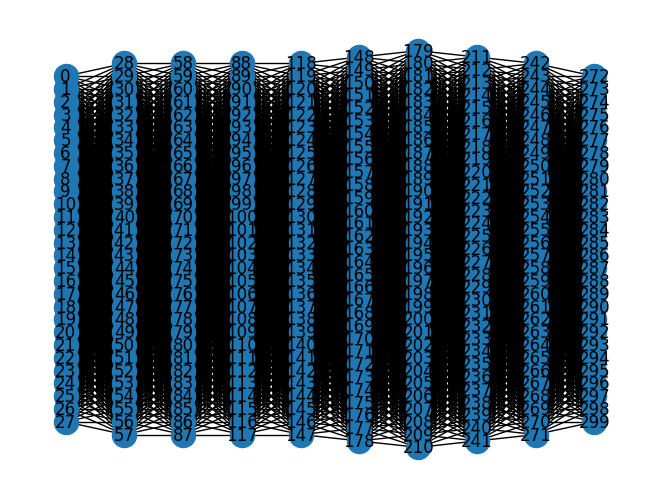

In [440]:
G = to_networkx(graph, to_undirected=True)

n_sum = [0] + list(np.cumsum(n_nodes))

for i, n in enumerate(n_nodes):
	for j in range(n):
		G.nodes[j + n_sum[i]]['level'] = i

pos = nx.multipartite_layout(G, subset_key="level")

nx.draw(G, pos=pos, with_labels=True)
